In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter


import numpy as np

from scipy.io import loadmat
from scipy.ndimage import imread

from skimage import data, io, filters

from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier

# Training Data

In [85]:
train_mat = loadmat('data/train_32x32.mat')['X']
train_labels = loadmat('data/train_32x32.mat')['y']
shape_train = train_mat.shape

# Testing Data

In [86]:
test_mat = loadmat('data/test_32x32.mat')['X']
test_labels = loadmat('data/test_32x32.mat')['y']
shape_test = test_mat.shape

# Test vs Train Labels

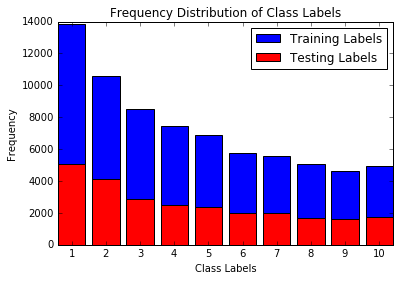

In [87]:
temp_labels = train_labels.reshape(len(train_labels)).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
plt.xticks(range(len(temp_labels)), temp_labels.keys())
temp_labels = test_labels.reshape(26032).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='red', label='Testing Labels')
plt.legend()
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Labels')
plt.show()

In [99]:
train_data = train_mat
test_data = test_mat
#train_data = (train_mat.astype('float32') / 128.0) -1
#test_data = (test_mat.astype('float32') / 128.0) -1

In [100]:
"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Limit data for early exploration

In [109]:
image_limiter = 1000

assert len(x_train2d.shape) == 2
assert len(x_test2d.shape) == 2

x_train2d = x_train2d[:image_limiter]
y_train = y_train[:image_limiter]

print('X Shape: {0}'.format(x_train2d.shape))
print('Y Shape: {0}'.format(y_train.shape))

X Shape: (1000, 3072)
Y Shape: (1000,)


# Support Vector Machine

In [111]:
svm_clf = SVC(gamma=0.001, C=100.)
svm_mdl = svm_clf.fit(x_train2d[:-1], y_train[:-1])  

In [113]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, svm_mdl.predict(x_test2d))

0.19587430854333129